# 1.	The quarterly gross domestic product series shown below has which components of a time series?
a.	Trend only
b.	Seasonality only
c.	Both Trend and seasonality
d.	None can be identifiable


Answer : c (Both Trend and seasonality)

# 2.	If a quarterly time series has additive seasonality, then find out the missing value
Q1 = 25
Q2 = -5
Q3 =  ?
Q4 = 10

Q3 = -30

# 3.a) Read & Plot Time Series Data

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf


In [2]:
data = pd.read_csv('AusWineSales.csv')
data.head(5)

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91


In [3]:
data.tail(5)

,YearMonth,Red,Sparkling,Sweetwhite
182,1995-03,2459,1897,188
183,1995-04,2618,1862,195
184,1995-05,2585,1670,189
185,1995-06,3310,1688,220
186,1995-07,3923,2031,274


In [4]:
date_rng = pd.date_range(start='1/1/1980', end='31/07/1995', freq='Y')
date_rng

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [5]:
data['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
data.head(8)

,YearMonth,Red,Sparkling,Sweetwhite,TimeIndex
0,1980-01,464,1686,85,1980-12-31
1,1980-02,675,1591,89,1981-12-31
2,1980-03,703,2304,109,1982-12-31
3,1980-04,887,1712,95,1983-12-31
4,1980-05,1139,1471,91,1984-12-31
5,1980-06,1077,1377,95,1985-12-31
6,1980-07,1318,1966,96,1986-12-31
7,1980-08,1260,2453,128,1987-12-31


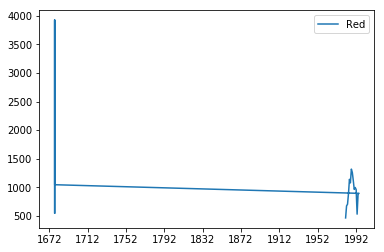

In [6]:
plt.plot(data.TimeIndex, data.Red)
plt.legend(loc='best')
#pyplot.show()

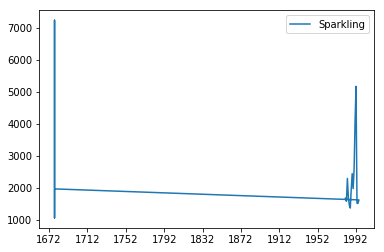

In [7]:
plt.plot(data.TimeIndex, data.Sparkling)
plt.legend(loc='best')
#pyplot.show()

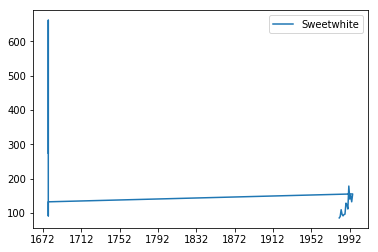

In [8]:
plt.plot(data.TimeIndex, data.Sweetwhite)
plt.legend(loc='best')
#pyplot.show()

In [9]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(data))

In [10]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [11]:
data.drop(['YearMonth'], axis=1, inplace=True)

In [12]:
data.set_index(dates, inplace=True)

In [13]:
data.head()

,Red,Sparkling,Sweetwhite,TimeIndex,Month,Year
1980-01-01,464,1686,85,1980-12-31,Jan,1980
1980-02-01,675,1591,89,1981-12-31,Feb,1980
1980-03-01,703,2304,109,1982-12-31,Mar,1980
1980-04-01,887,1712,95,1983-12-31,Apr,1980
1980-05-01,1139,1471,91,1984-12-31,May,1980


# c.Do month plot on both sparkling and red wine series. Which is the main difference noted between the two series?

MONTH PLOT ON SPARKLING

In [14]:
monthly_sales_data = pd.pivot_table(data, values = "Sparkling", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Dec,5179.0,4551.0,4524.0,4923.0,5274.0,5434.0,5891.0,7242.0,6757.0,6694.0,6047.0,6153.0,6119.0,6410.0,5999.0,NaN
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0


In [15]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Sep,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


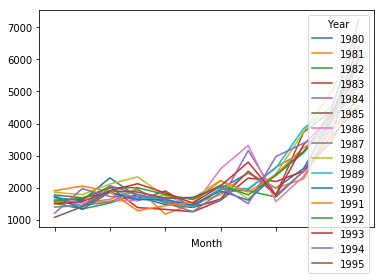

In [16]:
monthly_sales_data.plot()

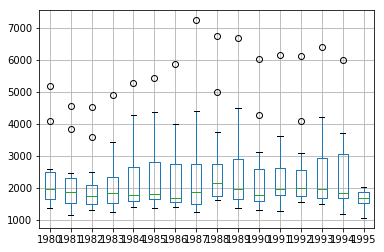

In [17]:
monthly_sales_data.boxplot()

In [18]:
yearly_sales_data = pd.pivot_table(data, values = "Sparkling", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


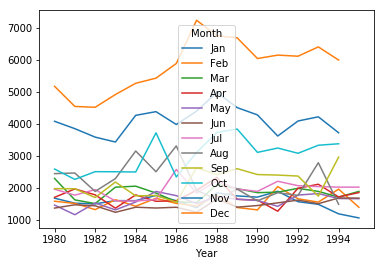

In [19]:
yearly_sales_data.plot()

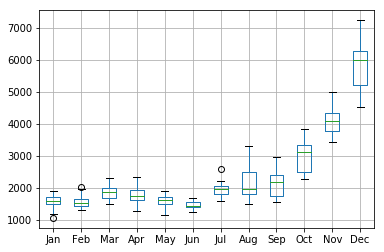

In [20]:
yearly_sales_data.boxplot()

Sparkling series behaviour is in 'ADDITIVE' in nature

MONTH PLOT ON REDWINE

In [21]:
monthly_sales_data = pd.pivot_table(data, values = "Red", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,887.0,1045.0,980.0,977.0,1124.0,1205.0,1522.0,1691.0,1612.0,1763.0,1683.0,1518.0,1860.0,2257.0,2455.0,2618.0
Aug,1260.0,1577.0,1286.0,1708.0,2258.0,2083.0,2326.0,2062.0,2249.0,2141.0,2353.0,2393.0,2224.0,3330.0,2665.0,NaN
Dec,960.0,1063.0,1015.0,1209.0,1828.0,1376.0,1613.0,2186.0,1868.0,2344.0,2286.0,2171.0,2724.0,2535.0,2684.0,NaN
Feb,675.0,883.0,635.0,722.0,830.0,997.0,1005.0,1150.0,1549.0,1430.0,1199.0,1665.0,1335.0,1247.0,1728.0,1749.0
Jan,464.0,530.0,544.0,615.0,699.0,809.0,779.0,814.0,966.0,1138.0,970.0,1007.0,1212.0,891.0,1041.0,1185.0
Jul,1318.0,1565.0,1404.0,1520.0,1753.0,1378.0,2116.0,2100.0,2907.0,2503.0,2439.0,2822.0,2835.0,3057.0,3670.0,3923.0
Jun,1077.0,1287.0,1064.0,1437.0,1270.0,1513.0,1546.0,1754.0,2137.0,2067.0,2051.0,2207.0,2152.0,2255.0,2660.0,3310.0
Mar,703.0,894.0,804.0,832.0,996.0,1164.0,1193.0,1225.0,1538.0,1809.0,1718.0,1642.0,2011.0,2017.0,2201.0,2459.0
May,1139.0,1199.0,1018.0,1270.0,1458.0,1538.0,1539.0,1759.0,2078.0,2200.0,2025.0,1831.0,1954.0,2255.0,2204.0,2585.0


In [22]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,464.0,530.0,544.0,615.0,699.0,809.0,779.0,814.0,966.0,1138.0,970.0,1007.0,1212.0,891.0,1041.0,1185.0
Feb,675.0,883.0,635.0,722.0,830.0,997.0,1005.0,1150.0,1549.0,1430.0,1199.0,1665.0,1335.0,1247.0,1728.0,1749.0
Mar,703.0,894.0,804.0,832.0,996.0,1164.0,1193.0,1225.0,1538.0,1809.0,1718.0,1642.0,2011.0,2017.0,2201.0,2459.0
Apr,887.0,1045.0,980.0,977.0,1124.0,1205.0,1522.0,1691.0,1612.0,1763.0,1683.0,1518.0,1860.0,2257.0,2455.0,2618.0
May,1139.0,1199.0,1018.0,1270.0,1458.0,1538.0,1539.0,1759.0,2078.0,2200.0,2025.0,1831.0,1954.0,2255.0,2204.0,2585.0
Jun,1077.0,1287.0,1064.0,1437.0,1270.0,1513.0,1546.0,1754.0,2137.0,2067.0,2051.0,2207.0,2152.0,2255.0,2660.0,3310.0
Jul,1318.0,1565.0,1404.0,1520.0,1753.0,1378.0,2116.0,2100.0,2907.0,2503.0,2439.0,2822.0,2835.0,3057.0,3670.0,3923.0
Aug,1260.0,1577.0,1286.0,1708.0,2258.0,2083.0,2326.0,2062.0,2249.0,2141.0,2353.0,2393.0,2224.0,3330.0,2665.0,NaN
Sep,1120.0,1076.0,1104.0,1151.0,1208.0,1357.0,1596.0,2012.0,1883.0,2103.0,2230.0,2306.0,2182.0,1896.0,2639.0,NaN


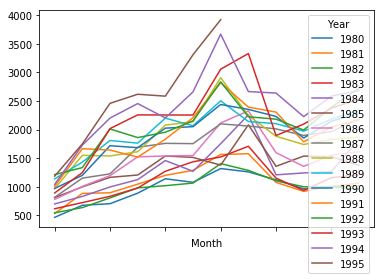

In [23]:
monthly_sales_data.plot()

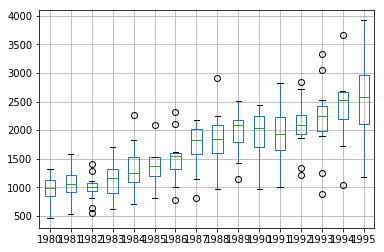

In [24]:
monthly_sales_data.boxplot()

In [25]:
yearly_sales_data = pd.pivot_table(data, values = "Red", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,464.0,675.0,703.0,887.0,1139.0,1077.0,1318.0,1260.0,1120.0,963.0,996.0,960.0
1981,530.0,883.0,894.0,1045.0,1199.0,1287.0,1565.0,1577.0,1076.0,918.0,1008.0,1063.0
1982,544.0,635.0,804.0,980.0,1018.0,1064.0,1404.0,1286.0,1104.0,999.0,996.0,1015.0
1983,615.0,722.0,832.0,977.0,1270.0,1437.0,1520.0,1708.0,1151.0,934.0,1159.0,1209.0
1984,699.0,830.0,996.0,1124.0,1458.0,1270.0,1753.0,2258.0,1208.0,1241.0,1265.0,1828.0
1985,809.0,997.0,1164.0,1205.0,1538.0,1513.0,1378.0,2083.0,1357.0,1536.0,1526.0,1376.0
1986,779.0,1005.0,1193.0,1522.0,1539.0,1546.0,2116.0,2326.0,1596.0,1356.0,1553.0,1613.0
1987,814.0,1150.0,1225.0,1691.0,1759.0,1754.0,2100.0,2062.0,2012.0,1897.0,1964.0,2186.0
1988,966.0,1549.0,1538.0,1612.0,2078.0,2137.0,2907.0,2249.0,1883.0,1739.0,1828.0,1868.0


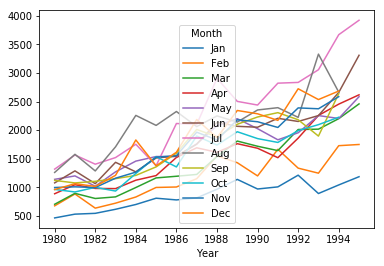

In [26]:
yearly_sales_data.plot()

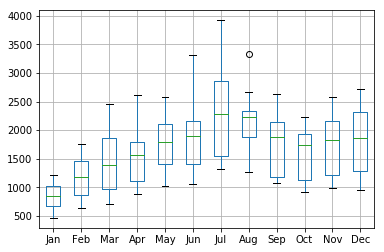

In [27]:
yearly_sales_data.boxplot()

Red wine series behaviour is in 'MULTIPLICATIVE' in nature

# d.	Extract seasonality for both series. Argue which seasonality (additive or multiplicative) will be appropriate for which series. Plot only the seasonality.

Seasonality for Sparkling

In [28]:
Seasonsparkling = pd.pivot_table(data, values = "Sparkling", columns = "Month", index = "Year")
Seasonsparkling.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0


<Figure size 1728x576 with 0 Axes>

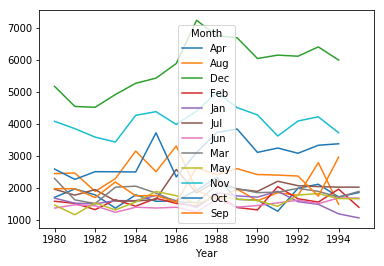

In [29]:
plt.figure(figsize=(24,8))
Seasonsparkling.plot()

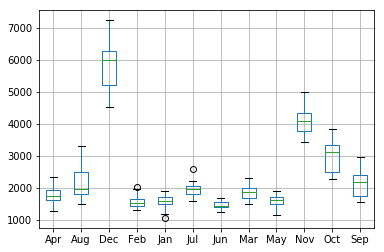

In [30]:
Seasonsparkling.boxplot()

Seasonality for sparkling is in 'additive'

Seasonality for Redwine

In [31]:
Seasonred = pd.pivot_table(data, values = "Red", columns = "Month", index = "Year")
Seasonred.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1980,887.0,1260.0,960.0,675.0,464.0,1318.0,1077.0,703.0,1139.0,996.0,963.0,1120.0
1981,1045.0,1577.0,1063.0,883.0,530.0,1565.0,1287.0,894.0,1199.0,1008.0,918.0,1076.0
1982,980.0,1286.0,1015.0,635.0,544.0,1404.0,1064.0,804.0,1018.0,996.0,999.0,1104.0
1983,977.0,1708.0,1209.0,722.0,615.0,1520.0,1437.0,832.0,1270.0,1159.0,934.0,1151.0
1984,1124.0,2258.0,1828.0,830.0,699.0,1753.0,1270.0,996.0,1458.0,1265.0,1241.0,1208.0


<Figure size 1728x576 with 0 Axes>

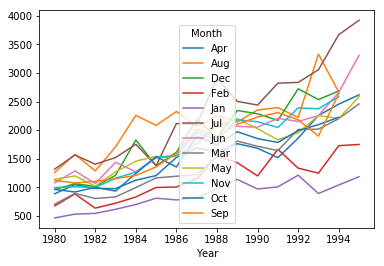

In [32]:
plt.figure(figsize=(24,8))
Seasonred.plot()

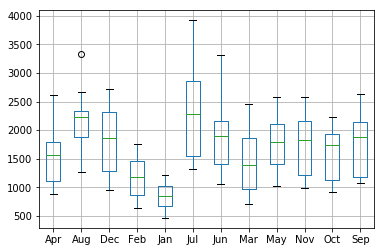

In [33]:
Seasonred.boxplot()

seasonality for redwine is 'multiplicative' in nature

# e.Forecast for sparkling wine sales for next 12 months. Explain the model and write down the model parameters.

In [34]:
df_sparkling = data[['Month', 'Year', 'Sparkling']]
sparkling_ts = df_sparkling['Sparkling']

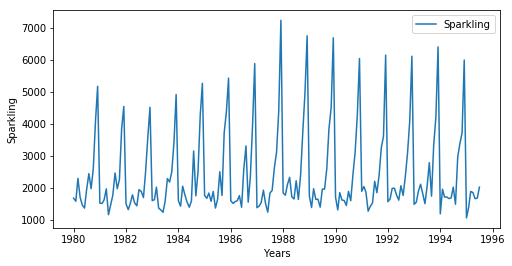

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(sparkling_ts)
plt.xlabel('Years')
plt.ylabel('Sparkling')
plt.legend(loc='best')

In [36]:
Sparklin = pd.pivot_table(data, values = "Sparkling",columns = "Month", index = "Year")
Sparklin.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0


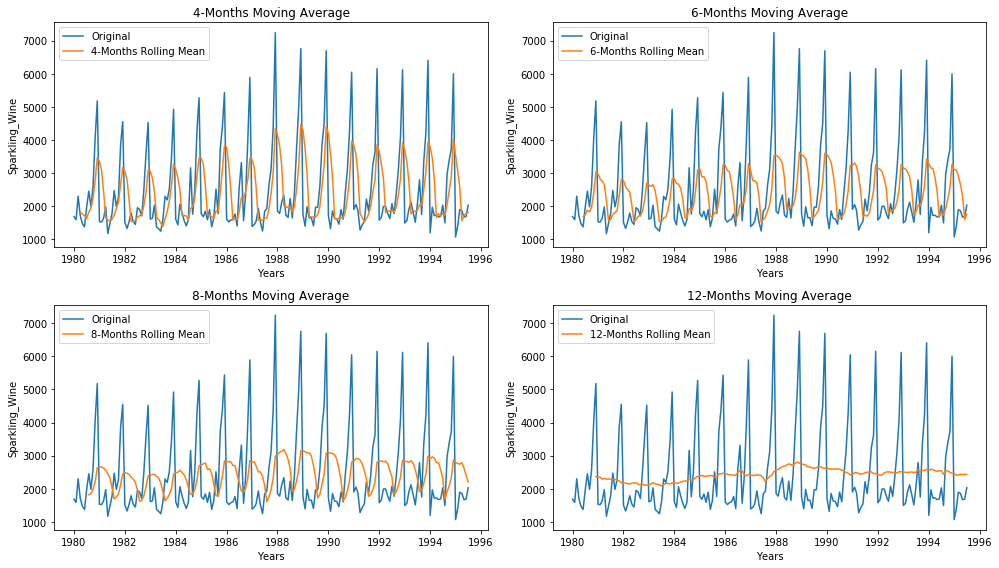

In [37]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sparkling_ts.index, sparkling_ts, label='Original')
axes[0][0].plot(sparkling_ts.index, sparkling_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Sparkling_Wine")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sparkling_ts.index, sparkling_ts, label='Original')
axes[0][1].plot(sparkling_ts.index, sparkling_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Sparkling_Wine")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sparkling_ts.index, sparkling_ts, label='Original')
axes[1][0].plot(sparkling_ts.index, sparkling_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Sparkling_Wine")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sparkling_ts.index, sparkling_ts, label='Original')
axes[1][1].plot(sparkling_ts.index, sparkling_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Sparkling_Wine")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

In [38]:
# extract out the time-series
sparklingsales = data['Sparkling']

Text(0,0.5,'Sparkling Sales')

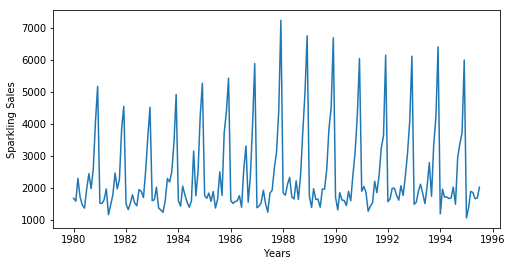

In [39]:
plt.figure(figsize=(8, 4))
plt.plot(sparklingsales)
plt.xlabel('Years')
plt.ylabel('Sparkling Sales')

In [52]:
#Determing rolling statistics
rolmean = sparklingsales.rolling(window=12).mean()
rolstd = sparklingsales.rolling(window=12).std()

Text(0.5,1,'Rolling Mean & Standard Deviation')

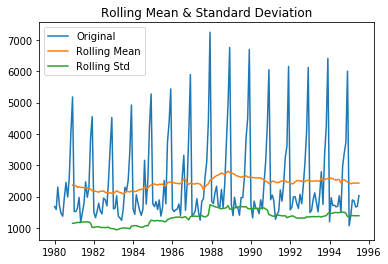

In [53]:
#Plot rolling statistics:
orig = plt.plot(sparklingsales, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [55]:
dftest = adfuller(sparklingsales)
dftest

(-1.360497454812335,
 0.6010608871634864,
 11,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2573.1222090270685)

In [56]:
decomposition = sm.tsa.seasonal_decompose(sparklingsales, model='multiplicative')

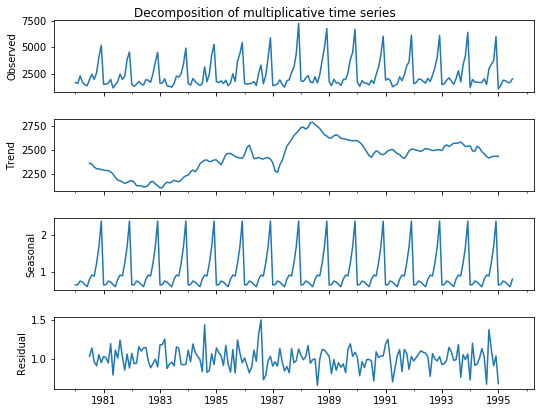

In [57]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Text(0,0.5,'Sales')

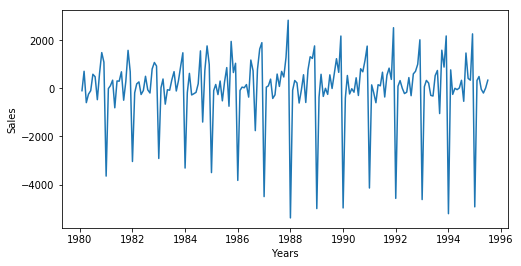

In [58]:
plt.figure(figsize=(8, 4))
plt.plot(sparklingsales.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sales')

In [59]:
adfuller(sparklingsales.diff(periods=1)[1:,])

(-45.05030093619533,
 0.0,
 10,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2558.7300781174945)

Text(0,0.5,'Log (Tractor Sales)')

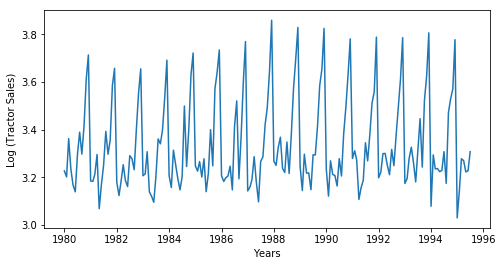

In [60]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sparklingsales))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

Text(0,0.5,'Differenced Log (Tractor Sales)')

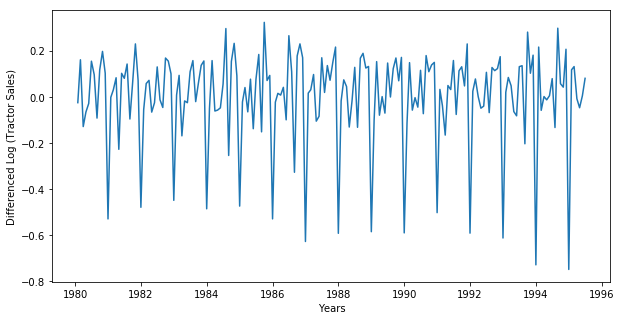

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sparklingsales).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [62]:
adfuller(np.log10(sparklingsales).diff(periods=1)[2:,])

(-31.2389795083977,
 0.0,
 10,
 174,
 {'1%': -3.4685016947910636,
  '5%': -2.8782983668563396,
  '10%': -2.57570415906989},
 -364.90282376399193)

In [63]:
sales_ts_log = np.log10(sparklingsales)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

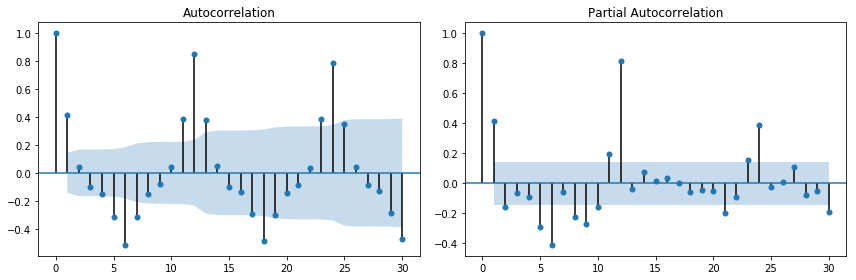

In [64]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

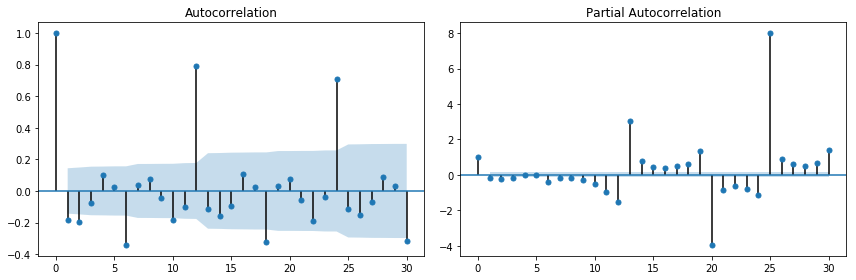

In [65]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [72]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [73]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [74]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [69]:
#Separate data into train and test
data['date'] = data.index
train = data[data.index < '1980-01-01']
test = data[data.index >= '1995-07-01']
train_sales_ts_log = np.log10(train['Sparkling'])

In [70]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [75]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ASHISH\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Best SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 model - AIC:2.0


In [76]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

ValueError: maxlag should be < nobs

In [77]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

NameError: name 'best_results' is not defined

# b.	Smooth the series of sweet white sales with an appropriate moving average. Plot both the original and moving average on the same graph, preferably using different colors.

In [40]:
data_sweetwhite = data[['Month', 'Year', 'Sweetwhite']]
sweetwhite_ts = data_sweetwhite['Sweetwhite']

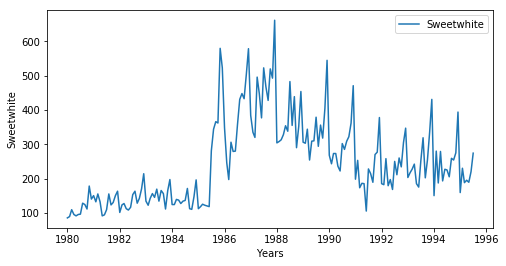

In [41]:
plt.figure(figsize=(8, 4))
plt.plot(sweetwhite_ts)
plt.xlabel('Years')
plt.ylabel('Sweetwhite')
plt.legend(loc='best')

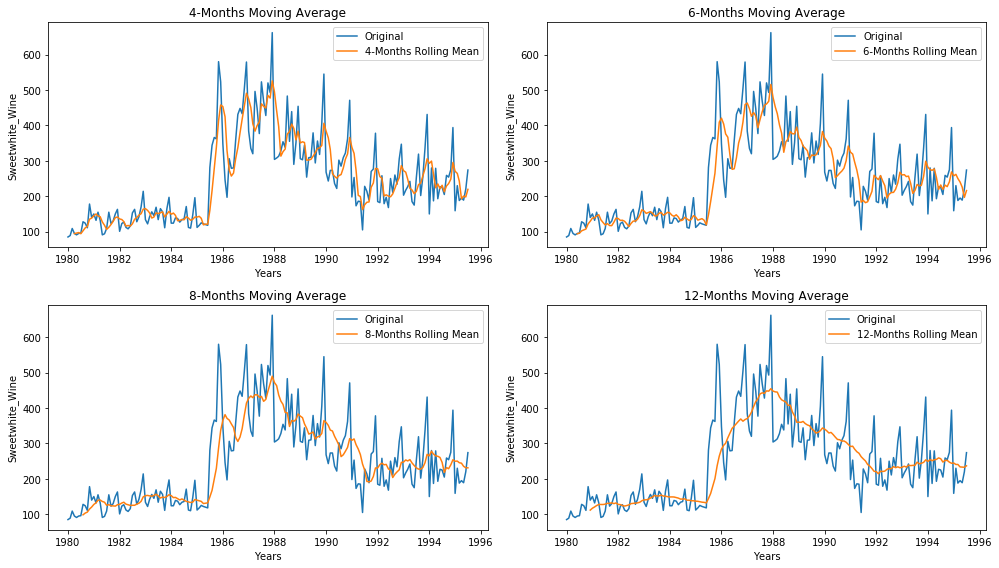

In [42]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sweetwhite_ts.index, sweetwhite_ts, label='Original')
axes[0][0].plot(sweetwhite_ts.index, sweetwhite_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Sweetwhite_Wine")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sweetwhite_ts.index, sweetwhite_ts, label='Original')
axes[0][1].plot(sweetwhite_ts.index, sweetwhite_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Sweetwhite_Wine")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sweetwhite_ts.index, sweetwhite_ts, label='Original')
axes[1][0].plot(sweetwhite_ts.index, sweetwhite_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Sweetwhite_Wine")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sweetwhite_ts.index, sweetwhite_ts, label='Original')
axes[1][1].plot(sweetwhite_ts.index, sweetwhite_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Sweetwhite_Wine")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()


In [43]:
#Determing rolling statistics
rolmean = sweetwhite_ts.rolling(window=12).mean()
rolstd = sweetwhite_ts.rolling(window=12).std()

Text(0.5,1,'Rolling Mean & Standard Deviation')

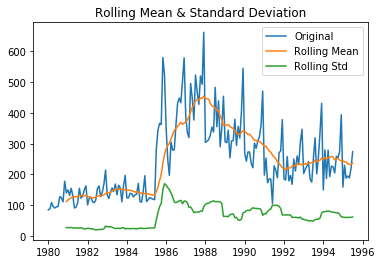

In [44]:
#Plot rolling statistics:
orig = plt.plot(sweetwhite_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [45]:
from statsmodels.tsa.stattools import adfuller  #DICKEY-FULLER
dftest = adfuller(sweetwhite_ts)
dftest

(-1.71739742164999,
 0.4221718269695356,
 13,
 173,
 {'1%': -3.4687256239864017,
  '5%': -2.8783961376954363,
  '10%': -2.57575634100705},
 1880.6778070857513)

In [46]:
monthly_sales_data = pd.pivot_table(data_sweetwhite, values = "Sweetwhite", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,95.0,132.0,112.0,156.0,137.0,122.0,306.0,496.0,328.0,254.0,273.0,186.0,179.0,242.0,279.0,195.0
Aug,128.0,155.0,163.0,165.0,171.0,344.0,431.0,468.0,355.0,294.0,285.0,214.0,211.0,319.0,205.0,NaN
Dec,140.0,163.0,214.0,197.0,196.0,523.0,579.0,662.0,454.0,545.0,471.0,378.0,347.0,431.0,394.0,NaN
Feb,89.0,132.0,123.0,122.0,124.0,118.0,246.0,335.0,308.0,303.0,243.0,253.0,182.0,217.0,280.0,230.0
Jan,85.0,150.0,101.0,134.0,124.0,112.0,348.0,384.0,304.0,306.0,268.0,198.0,185.0,203.0,150.0,159.0
Jul,96.0,109.0,153.0,134.0,136.0,281.0,358.0,523.0,483.0,379.0,302.0,228.0,250.0,252.0,225.0,274.0
Jun,95.0,94.0,116.0,169.0,134.0,118.0,280.0,377.0,338.0,310.0,222.0,105.0,168.0,175.0,227.0,220.0
Mar,109.0,155.0,127.0,142.0,139.0,125.0,197.0,320.0,313.0,344.0,273.0,173.0,258.0,227.0,187.0,188.0
May,91.0,91.0,108.0,145.0,127.0,120.0,279.0,448.0,354.0,309.0,236.0,185.0,197.0,185.0,193.0,189.0


In [47]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,85.0,150.0,101.0,134.0,124.0,112.0,348.0,384.0,304.0,306.0,268.0,198.0,185.0,203.0,150.0,159.0
Feb,89.0,132.0,123.0,122.0,124.0,118.0,246.0,335.0,308.0,303.0,243.0,253.0,182.0,217.0,280.0,230.0
Mar,109.0,155.0,127.0,142.0,139.0,125.0,197.0,320.0,313.0,344.0,273.0,173.0,258.0,227.0,187.0,188.0
Apr,95.0,132.0,112.0,156.0,137.0,122.0,306.0,496.0,328.0,254.0,273.0,186.0,179.0,242.0,279.0,195.0
May,91.0,91.0,108.0,145.0,127.0,120.0,279.0,448.0,354.0,309.0,236.0,185.0,197.0,185.0,193.0,189.0
Jun,95.0,94.0,116.0,169.0,134.0,118.0,280.0,377.0,338.0,310.0,222.0,105.0,168.0,175.0,227.0,220.0
Jul,96.0,109.0,153.0,134.0,136.0,281.0,358.0,523.0,483.0,379.0,302.0,228.0,250.0,252.0,225.0,274.0
Aug,128.0,155.0,163.0,165.0,171.0,344.0,431.0,468.0,355.0,294.0,285.0,214.0,211.0,319.0,205.0,NaN
Sep,124.0,123.0,128.0,156.0,112.0,366.0,448.0,428.0,439.0,356.0,309.0,189.0,260.0,202.0,259.0,NaN


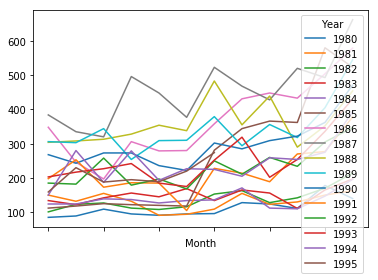

In [48]:
monthly_sales_data.plot()

In [49]:
yearly_sales_data = pd.pivot_table(data_sweetwhite, values = "Sweetwhite", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,85.0,89.0,109.0,95.0,91.0,95.0,96.0,128.0,124.0,111.0,178.0,140.0
1981,150.0,132.0,155.0,132.0,91.0,94.0,109.0,155.0,123.0,130.0,150.0,163.0
1982,101.0,123.0,127.0,112.0,108.0,116.0,153.0,163.0,128.0,142.0,170.0,214.0
1983,134.0,122.0,142.0,156.0,145.0,169.0,134.0,165.0,156.0,111.0,165.0,197.0
1984,124.0,124.0,139.0,137.0,127.0,134.0,136.0,171.0,112.0,110.0,147.0,196.0
1985,112.0,118.0,125.0,122.0,120.0,118.0,281.0,344.0,366.0,362.0,580.0,523.0
1986,348.0,246.0,197.0,306.0,279.0,280.0,358.0,431.0,448.0,433.0,504.0,579.0
1987,384.0,335.0,320.0,496.0,448.0,377.0,523.0,468.0,428.0,520.0,493.0,662.0
1988,304.0,308.0,313.0,328.0,354.0,338.0,483.0,355.0,439.0,290.0,352.0,454.0


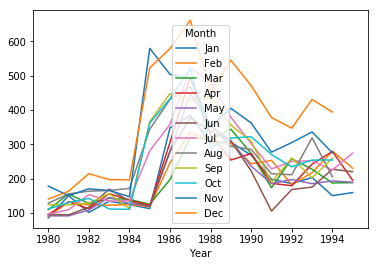

In [50]:
yearly_sales_data.plot()

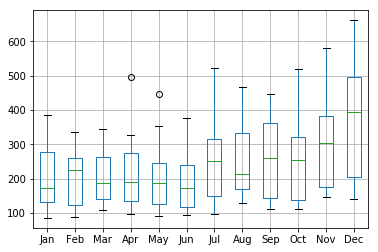

In [51]:
yearly_sales_data.boxplot()

Sweet wine series is in 'MULTIPLICATIVE' nature